In [1]:
import sklearn
import numpy as np
import pickle as pkl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
from funcs.utils import *
from funcs.explain import *
import shap
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

from funcs.DIMV import DIMVImputation
from funcs.miss_forest import mf

missing_rate = 0.2
nruns = 10
ouput_name = 'XGBRegressor_glass_rate02'  


data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data',
                  sep = ",", header = None)
data = data.drop([0],axis=1).reset_index(drop=True) #remove the id column
# data.columns = range(data.shape[1]) #reset column index starting from 0
data.head()


Instructions for updating:
non-resource variables are not supported in the long term


,1,2,3,4,5,6,7,8,9,10
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [2]:
data.colums = str(data.columns)

In [3]:
y = data.iloc[:,9].to_numpy()-1#to start the class from 0
G = len(np.unique(y))
X = data.iloc[:, range(9)]
X.head()

,1,2,3,4,5,6,7,8,9
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [4]:
def get_split():
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns = X_train.columns)

    y_train, y_test = y_train.reshape((-1,1)), y_test.reshape((-1,1))
    encoder = LabelEncoder()
    encoder.fit(y_train)
    y_train = pd.DataFrame(encoder.transform(y_train))
    y_test = pd.DataFrame(encoder.transform(y_test))    
    X_train_star = generate_missing_data(X_train, rate=missing_rate)
    X_test_star = generate_missing_data(X_test, rate=missing_rate) 
    return X_train, X_train_star, y_train, X_test, X_test_star, y_test

chosen_model = xgboost.XGBClassifier(n_estimators=100, max_depth=2)

# Generate missing data, impute, and use SHAP to explain

In [5]:
results = []
for i in range(nruns):
    X_train, X_train_star, y_train, X_test, X_test_star, y_test = get_split()
    print('iteration:',i)
    results.append(one_run(X_train, X_train_star, y_train, X_test, X_test_star, y_test, chosen_model, get_spearrman = False))

C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


iteration: 0


C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 60.63it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 92.65it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 85.96it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 90.63it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 91.33it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 88.89it/s]


Validation result: best alpha 1.0, best score 0.7757217851009943, scores {0.0: 9.02687066620912, 0.01: 274.8276064951791, 0.1: 7.454546357767808, 1.0: 0.7757217851009943, 10.0: 0.9419577288397186, 100.0: 0.9890745087116021}
Value alpha used in for transforming is: 1.0


100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 497.59it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 81.27it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 87.20it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 95.96it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 86.91it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 86.75it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 95.58it/s]


Validation result: best alpha 1.0, best score 0.7757217851009944, scores {0.0: 9.02687066620912, 0.01: 274.8276064951791, 0.1: 7.454546357767808, 1.0: 0.7757217851009944, 10.0: 0.9419577288397186, 100.0: 0.9890745087116021}
Value alpha used in for transforming is: 1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 1023.50it/s]


loss 0.10346309946842279
loss 0.02311883813965171
loss 0.020556147960509807
loss 0.018117487168426063
loss 0.0204119634686563
loss 0.022485869325611512
loss 0.021440298841301136
loss 0.02286101307745979
loss 0.02055092103897007
loss 0.02078072934408925
number of runs used by missForest: 10
loss: 0.02078072934408925
loss 0.117422533507445
loss 0.029980763681521517
loss 0.02302668951945588
loss 0.023814598229567583
loss 0.021375279352570713
loss 0.021173997733642567
loss 0.024200201983104946
loss 0.02761965451834135
loss 0.029553666226671695
loss 0.02701794453649187
number of runs used by missForest: 10
loss: 0.02701794453649187



100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 654.44it/s]
C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=Tr

iteration: 1


C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 74.79it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 91.34it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 93.24it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 80.51it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 90.21it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 91.56it/s]


Validation result: best alpha 1.0, best score 0.7962481682828834, scores {0.0: 12.618803999349952, 0.01: 2.5882574592237497, 0.1: 1.079778903444611, 1.0: 0.7962481682828834, 10.0: 0.9647352230025399, 100.0: 1.0097416790829405}
Value alpha used in for transforming is: 1.0


100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 477.53it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 85.88it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 90.91it/s]


Running Cross Validation, alpha=0.1


100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 100.33it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 80.16it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 91.82it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 91.85it/s]


Validation result: best alpha 1.0, best score 0.7962481682828833, scores {0.0: 12.618803999349952, 0.01: 2.5882574592237497, 0.1: 1.0797789034446108, 1.0: 0.7962481682828833, 10.0: 0.9647352230025399, 100.0: 1.0097416790829408}
Value alpha used in for transforming is: 1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 1299.17it/s]


loss 0.13636707775158696
loss 0.025540276102869575
loss 0.022124732060621204
loss 0.012578398554290668
loss 0.014577834924718522
loss 0.01387303960422711
loss 0.014400330223273531
loss 0.014280085525169354
loss 0.0139877326945102
loss 0.011568177235095269
number of runs used by missForest: 10
loss: 0.011568177235095269
loss 0.11030498104576543
loss 0.015202750485288507
loss 0.011054784897139196
loss 0.009348888349641246
number of runs used by missForest: 4
loss: 0.009348888349641246


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 693.91it/s]
C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=Tr

iteration: 2


C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 80.05it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 98.36it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 92.99it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 94.50it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 96.78it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 94.46it/s]


Validation result: best alpha 0.1, best score 0.6525638191778927, scores {0.0: 0.9491509227688631, 0.01: 0.6783756391696246, 0.1: 0.6525638191778927, 1.0: 0.762095979080567, 10.0: 0.9112407409674388, 100.0: 0.949245555147418}
Value alpha used in for transforming is: 0.1


100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 388.32it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 102.68it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 93.51it/s]


Running Cross Validation, alpha=0.1


100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 102.81it/s]


Running Cross Validation, alpha=1.0


100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 106.67it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 93.38it/s]


Running Cross Validation, alpha=100.0


100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 107.89it/s]


Validation result: best alpha 0.1, best score 0.6525638191778927, scores {0.0: 0.9491509227688631, 0.01: 0.6783756391696246, 0.1: 0.6525638191778927, 1.0: 0.762095979080567, 10.0: 0.9112407409674387, 100.0: 0.949245555147418}
Value alpha used in for transforming is: 0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 1575.29it/s]


loss 0.09868636675287884
loss 0.02362595779498492
loss 0.011680724947498819
loss 0.011334064841689188
loss 0.012893364366247217
loss 0.019968205814156276
loss 0.017446281003127475
loss 0.017335238101557904
loss 0.018161750202184784
loss 0.017216213230742336
number of runs used by missForest: 10
loss: 0.017216213230742336
loss 0.11263134825951555
loss 0.0314713602614536
loss 0.024197974753624386
loss 0.018956454133031254
loss 0.015331422284640898
loss 0.016685135944865218
loss 0.015176609358476659
loss 0.017138378174630035
loss 0.014342540327110392
loss 0.013096576226523791
number of runs used by missForest: 10
loss: 0.013096576226523791


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 661.80it/s]
C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=Tr

iteration: 3


C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 61.06it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 93.03it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 88.20it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 86.18it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 85.44it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 94.98it/s]


Validation result: best alpha 0.0, best score 0.6404528396981838, scores {0.0: 0.6404528396981838, 0.01: 0.6413627116600836, 0.1: 0.6582279403730693, 1.0: 0.7700302379485041, 10.0: 0.9290780428761873, 100.0: 0.9729623997260417}
Value alpha used in for transforming is: 0.0


100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 347.12it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 84.73it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 93.56it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 88.34it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 81.99it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 93.16it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 88.23it/s]


Validation result: best alpha 0.0, best score 0.6404528396981838, scores {0.0: 0.6404528396981838, 0.01: 0.6413627116600836, 0.1: 0.6582279403730693, 1.0: 0.7700302379485041, 10.0: 0.9290780428761872, 100.0: 0.9729623997260417}
Value alpha used in for transforming is: 0.0


100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 998.67it/s]


loss 0.08827299961209904
loss 0.02398154825620432
loss 0.015779072463433318
loss 0.010190906835880578
loss 0.006347156433470705
number of runs used by missForest: 5
loss: 0.006347156433470705
loss 0.10454328727190554
loss 0.020988606939812998
loss 0.012569468229774604
loss 0.008421604142475331
number of runs used by missForest: 4
loss: 0.008421604142475331


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 665.65it/s]
C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=Tr

iteration: 4


C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 65.35it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 95.40it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 93.45it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 94.98it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 97.89it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 98.79it/s]


Validation result: best alpha 0.1, best score 0.6827686370371723, scores {0.0: 1.6567524868352277, 0.01: 2.4868441159867007, 0.1: 0.6827686370371723, 1.0: 0.7994271688024875, 10.0: 0.9591089664316831, 100.0: 1.0006143808934262}
Value alpha used in for transforming is: 0.1


100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 434.99it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 90.98it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 93.32it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 91.49it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 93.26it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 91.66it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 95.18it/s]


Validation result: best alpha 0.1, best score 0.6827686370371723, scores {0.0: 1.6567524868352277, 0.01: 2.4868441159867007, 0.1: 0.6827686370371723, 1.0: 0.7994271688024875, 10.0: 0.9591089664316831, 100.0: 1.0006143808934262}
Value alpha used in for transforming is: 0.1


100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 999.09it/s]


loss 0.096294521783618
loss 0.028604393141545902
loss 0.01174659358546246
loss 0.012600575324096077
loss 0.011553254226359744
loss 0.012252390803437
loss 0.011098391878010724
loss 0.012779877196253215
loss 0.012753549518542979
loss 0.013976306857161785
number of runs used by missForest: 10
loss: 0.013976306857161785
loss 0.09805096068803149
loss 0.021542630711792982
loss 0.007696072993765896
number of runs used by missForest: 3
loss: 0.007696072993765896


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 662.95it/s]
C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=Tr

iteration: 5


C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 68.83it/s]


Running Cross Validation, alpha=0.01


100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 106.21it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 99.92it/s]


Running Cross Validation, alpha=1.0


100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 112.75it/s]


Running Cross Validation, alpha=10.0


100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 105.77it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 97.30it/s]


Validation result: best alpha 0.1, best score 0.6447702116690971, scores {0.0: 4.473160233694938, 0.01: 1.3958868310775807, 0.1: 0.6447702116690971, 1.0: 0.7681381156456702, 10.0: 0.9466285294456874, 100.0: 0.9950487986933811}
Value alpha used in for transforming is: 0.1


100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 405.39it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 99.95it/s]


Running Cross Validation, alpha=0.01


100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 111.55it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 96.98it/s]


Running Cross Validation, alpha=1.0


100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 103.09it/s]


Running Cross Validation, alpha=10.0


100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 116.21it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 98.07it/s]


Validation result: best alpha 0.1, best score 0.6447702116690971, scores {0.0: 4.473160233694938, 0.01: 1.3958868310775805, 0.1: 0.6447702116690971, 1.0: 0.7681381156456702, 10.0: 0.9466285294456875, 100.0: 0.9950487986933813}
Value alpha used in for transforming is: 0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 1227.68it/s]


loss 0.09635143366296907
loss 0.013601239645173024
loss 0.00768869105419057
number of runs used by missForest: 3
loss: 0.00768869105419057
loss 0.09444820422244088
loss 0.012499275922971759
loss 0.004073157448957527
number of runs used by missForest: 3
loss: 0.004073157448957527


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 639.32it/s]
C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=Tr

iteration: 6


C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 63.73it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 86.10it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 94.50it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 88.37it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 96.92it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 89.59it/s]


Validation result: best alpha 1.0, best score 0.7899704840979513, scores {0.0: 3.6925214014009717, 0.01: 1.987404536608485, 0.1: 7.5812614442258575, 1.0: 0.7899704840979513, 10.0: 0.9642136145755361, 100.0: 1.0072634685191142}
Value alpha used in for transforming is: 1.0


100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 369.93it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 87.23it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 92.99it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 91.79it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 96.65it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 88.08it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 92.74it/s]


Validation result: best alpha 1.0, best score 0.7899704840979513, scores {0.0: 3.6925214014009717, 0.01: 1.987404536608485, 0.1: 7.5812614442258575, 1.0: 0.7899704840979513, 10.0: 0.9642136145755361, 100.0: 1.0072634685191142}
Value alpha used in for transforming is: 1.0


100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 913.73it/s]


loss 0.0991636030471235
loss 0.022962374048814328
loss 0.01616595463371651
loss 0.017118849893734713
loss 0.016682826783710778
loss 0.0169620911443123
loss 0.015170456235689408
loss 0.014775352655082815
loss 0.014949228496755717
loss 0.016449202671806155
number of runs used by missForest: 10
loss: 0.016449202671806155
loss 0.09798657740776852
loss 0.023487196759280106
loss 0.012181766329185332
loss 0.010225814808469482
loss 0.010852038586327365
loss 0.011353779399879284
loss 0.009914725297260568
number of runs used by missForest: 7
loss: 0.009914725297260568


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 644.25it/s]
C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=Tr

iteration: 7


C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 84.03it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 99.11it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 98.35it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 95.28it/s]


Running Cross Validation, alpha=10.0


100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 112.52it/s]


Running Cross Validation, alpha=100.0


100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 107.36it/s]


Validation result: best alpha 0.1, best score 0.6479202758041397, scores {0.0: 6.791930583837521, 0.01: 7.534613783811088, 0.1: 0.6479202758041397, 1.0: 0.791300067168355, 10.0: 0.972392320577355, 100.0: 1.015836986439974}
Value alpha used in for transforming is: 0.1


100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 403.96it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 110.09it/s]


Running Cross Validation, alpha=0.01


100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 104.76it/s]


Running Cross Validation, alpha=0.1


100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 115.94it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 98.34it/s]


Running Cross Validation, alpha=10.0


100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 105.45it/s]


Running Cross Validation, alpha=100.0


100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 101.72it/s]


Validation result: best alpha 0.1, best score 0.6479202758041397, scores {0.0: 6.791930583837521, 0.01: 7.534613783811087, 0.1: 0.6479202758041397, 1.0: 0.7913000671683551, 10.0: 0.972392320577355, 100.0: 1.015836986439974}
Value alpha used in for transforming is: 0.1


100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 999.07it/s]


loss 0.08619469200983952
loss 0.013509487594838563
loss 0.016224236244218284
loss 0.013351462730457548
loss 0.013519063626971412
loss 0.013789126146112766
loss 0.013454772978371776
loss 0.012998312246713179
loss 0.012759454467329541
loss 0.013222075512062743
number of runs used by missForest: 10
loss: 0.013222075512062743
loss 0.09251369395211187
loss 0.017894498101233832
loss 0.013467648619292874
loss 0.009170051080553866
number of runs used by missForest: 4
loss: 0.009170051080553866


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 614.01it/s]
C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=Tr

iteration: 8


C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 65.37it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 76.42it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 96.90it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 90.69it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 99.19it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 84.89it/s]


Validation result: best alpha 0.1, best score 0.662857357420894, scores {0.0: 0.8315374185633018, 0.01: 1.5136680320193576, 0.1: 0.662857357420894, 1.0: 0.7798229598756427, 10.0: 0.9391578557375384, 100.0: 0.9840484698417248}
Value alpha used in for transforming is: 0.1


100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 359.56it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 92.62it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 98.86it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 90.54it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 94.81it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 85.40it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 93.01it/s]


Validation result: best alpha 0.1, best score 0.6628573574208941, scores {0.0: 0.8315374185633017, 0.01: 1.5136680320193576, 0.1: 0.6628573574208941, 1.0: 0.7798229598756428, 10.0: 0.9391578557375383, 100.0: 0.9840484698417248}
Value alpha used in for transforming is: 0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 1252.16it/s]


loss 0.10637283351309344
loss 0.01929140397483294
loss 0.01045709362765612
loss 0.006500227190555777
number of runs used by missForest: 4
loss: 0.006500227190555777
loss 0.10232475090342967
loss 0.020486432682546712
loss 0.011441008133238995
loss 0.008404800920397327
number of runs used by missForest: 4
loss: 0.008404800920397327


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 604.67it/s]
C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=Tr

iteration: 9


C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 64.10it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 80.09it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 80.63it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 93.26it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 87.94it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 85.35it/s]


Validation result: best alpha 0.1, best score 0.6815148610210977, scores {0.0: 7.33764573353664, 0.01: 84.33413793218085, 0.1: 0.6815148610210977, 1.0: 0.8069197198627203, 10.0: 0.9723184440471309, 100.0: 1.0139443808374464}
Value alpha used in for transforming is: 0.1


100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 358.25it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 81.86it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 90.63it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 92.04it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 87.55it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 86.06it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 82.17it/s]


Validation result: best alpha 0.1, best score 0.6815148610210976, scores {0.0: 7.33764573353664, 0.01: 84.33413793218085, 0.1: 0.6815148610210976, 1.0: 0.8069197198627203, 10.0: 0.9723184440471309, 100.0: 1.0139443808374464}
Value alpha used in for transforming is: 0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 1464.95it/s]


loss 0.09152425184796294
loss 0.026676750365356633
loss 0.023395546525617993
loss 0.021029345858681554
loss 0.017620621639375708
loss 0.01647003012697729
loss 0.01868208102743824
loss 0.020088861111965173
loss 0.022642655857883647
loss 0.021795567745871557
number of runs used by missForest: 10
loss: 0.021795567745871557
loss 0.08860120423930148
loss 0.022441770897112256
loss 0.013677876193951435
loss 0.011459478622166088
loss 0.01089246512689544
loss 0.010587532479014202
loss 0.01117835688786433
loss 0.011400315911746917
loss 0.009220201024693673
number of runs used by missForest: 9
loss: 0.009220201024693673


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 601.94it/s]


In [6]:
def get_average_shap_vals(results, j, nruns):
    # get the average shap values from all runs for each imputation method or the original 
    current = results[0][0][j]
    for i in range(1, nruns):
        current.values += results[i][0][j].values
        current.base_values += results[i][0][j].base_values
        current.data += results[i][0][j].data  
    current.values = current.values/nruns
    current.base_values = current.base_values/nruns
    current.data = current.data/nruns
    return current

In [7]:
shap_values_ori = get_average_shap_vals(results, j = 0, nruns= nruns)
shap_values_xm = get_average_shap_vals(results, j = 1, nruns= nruns)
shap_values_mi = get_average_shap_vals(results, j = 2, nruns = nruns)
shap_values_mice = get_average_shap_vals(results, j = 3, nruns= nruns)
shap_values_dimv = get_average_shap_vals(results, j = 4, nruns= nruns)
shap_values_mf = get_average_shap_vals(results, j = 5, nruns= nruns)
shap_values_soft = get_average_shap_vals(results, j = 6, nruns= nruns)
shap_values_gain = get_average_shap_vals(results, j = 7, nruns= nruns)

In [8]:
    j = 0
    mse_now = results[0][1][j]
    for i in range(1, nruns):
        mse_now += results[i][1][j]
    mse_imputation_all = mse_now/nruns  
    print("the MSE between the imputed X_test of mean imputation, MICE, DIMV, MissForest, SOFT-IMPUTE and the original X_test:")
    print(mse_imputation_all.round(3))

    j = 1
    mse_now = results[0][1][j]
    for i in range(1, nruns):
        mse_now += results[i][1][j]    
    mse_shap_all = mse_now/nruns 
    print("the MSE between the Shapley values of mean imputation, MICE, DIMV, MissForest, SOFT-IMPUTE and the original:")
    print(mse_shap_all.round(3))

    j = 2
    mse_ypred_now = results[0][1][j]
    for i in range(1, nruns):
        mse_ypred_now += results[i][1][j]    
    mse_ypred_all = mse_ypred_now/nruns 
    print("the MSE between y predicted on test set of mean imputation, MICE, DIMV, MissForest, SOFT-IMPUTE and the original:")
    print(mse_ypred_all.round(3))

the MSE between the imputed X_test of mean imputation, MICE, DIMV, MissForest, SOFT-IMPUTE and the original X_test:
[0.142 0.078 0.094 0.095 0.081 0.202]
the MSE between the Shapley values of mean imputation, MICE, DIMV, MissForest, SOFT-IMPUTE and the original:
[0.327 0.282 0.208 0.226 0.221 0.21  0.335]
the MSE between y predicted on test set of mean imputation, MICE, DIMV, MissForest, SOFT-IMPUTE and the original:
[0.926 0.872 0.781 0.733 0.614 0.714 1.133]


In [9]:
mse_imputation_all

array([0.14190551, 0.07761259, 0.09353349, 0.09512389, 0.08085575,
       0.20157823])

In [10]:
mse_shap_all

array([0.32702766, 0.28201592, 0.20762017, 0.22639728, 0.2205187 ,
       0.21018935, 0.33525709])

In [11]:
dfplot = pd.DataFrame({'MSE on X test':np.hstack(([0], mse_imputation_all)), 'MSE Shap': mse_shap_all}, index = ['Xgb on missing data','Mean Imputation','MICE','DIMV','missForest','SOFT-IMPUTE', 'GAIN'])
dfplot

,MSE on X test,MSE Shap
Xgb on missing data,0.000000,0.327028
Mean Imputation,0.141906,0.282016
MICE,0.077613,0.207620
DIMV,0.093533,0.226397
missForest,0.095124,0.220519
SOFT-IMPUTE,0.080856,0.210189
GAIN,0.201578,0.335257


In [12]:
dfplot.T.round(3)

,Xgb on missing data,Mean Imputation,MICE,DIMV,missForest,SOFT-IMPUTE,GAIN
MSE on X test,0.000,0.142,0.078,0.094,0.095,0.081,0.202
MSE Shap,0.327,0.282,0.208,0.226,0.221,0.210,0.335


In [13]:
dfplot.T.round(3).to_latex()

'\\begin{tabular}{lrrrrrrr}\n\\toprule\n & Xgb on missing data & Mean Imputation & MICE & DIMV & missForest & SOFT-IMPUTE & GAIN \\\\\n\\midrule\nMSE on X test & 0.000000 & 0.142000 & 0.078000 & 0.094000 & 0.095000 & 0.081000 & 0.202000 \\\\\nMSE Shap & 0.327000 & 0.282000 & 0.208000 & 0.226000 & 0.221000 & 0.210000 & 0.335000 \\\\\n\\bottomrule\n\\end{tabular}\n'

imputation MSE versus Shapley MSE


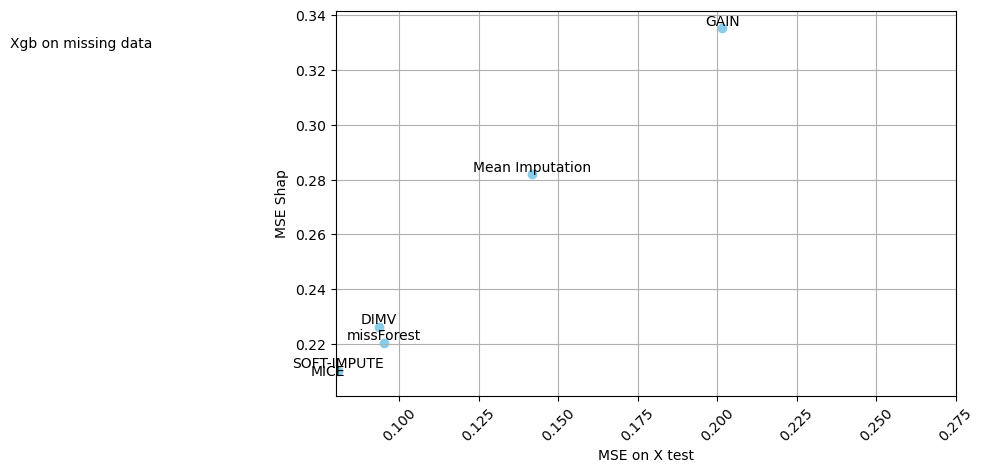

In [14]:
print('imputation MSE versus Shapley MSE')
plt.figure(figsize=(8, 5))
plt.scatter(dfplot['MSE on X test'],dfplot['MSE Shap'], color='skyblue')
for i, row in dfplot.iterrows():
    plt.text(row['MSE on X test'],row['MSE Shap'], row.name, ha='center', va='bottom')
plt.ylabel('MSE Shap')
plt.xlabel('MSE on X test')
plt.xlim(0.08, 0.275)
plt.xticks(rotation=45)
plt.grid(True)  # Adding grid for better visualization
plt.savefig('results/'+ ouput_name+'imputation_mse_vs_shap_mse'+'.png',bbox_inches='tight')
plt.show()

beeswarm plot for class 1


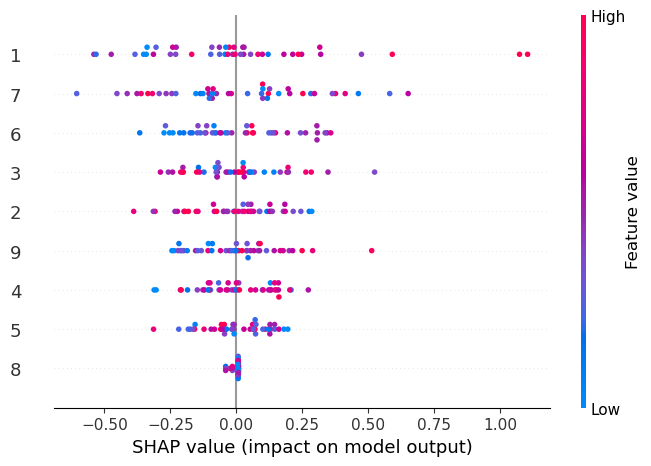

In [23]:
plt.figure()
print('beeswarm plot for class 1')
shap.plots.beeswarm(shap_values_ori[:,:,1], max_display=10, show=False)
plt.savefig('results/'+ ouput_name+'beeswarm'+'ori'+'.png',bbox_inches='tight')
plt.show()